## PROJECT TEAM--- 1034
## PROJECT-1020--- HOUSE PRICE PREDICTION


### TEAM MEMBER- SAI KRISHNA,  SHAMA MOHAMMED,  AVIROOP CHAKRABORTY




### In this project we will try to build a model which can predict the house price.To solve the problem we will use Regression model since it helps to predict continuous quantity.

## Performing necessary prerequisite steps

In [1]:
## Importing the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

## for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel




## Display all the columns/fields of the dataframe

pd.pandas.set_option('display.max_columns',None)

## Display all the rows of the dataframe

pd.pandas.set_option('display.max_rows',None)

In [2]:
## loading the data

dataset=pd.read_csv('data.csv')

## print shape of dataset with rows and columns

print(dataset.shape)

(1460, 81)


In [3]:
## print the top5 records

dataset.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL          NaN     9180   Pave   NaN      IR1   
43  44          20       RL          NaN     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2

In [4]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [5]:
## Seeing different feature types in 'dataset'

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##  Data Analysis ---Here we will find out the followings---

####                       1.Missing Values
####                       2.All The Numerical Variables
####                       3.Distribution of the Numerical Variables
####                       4.Categorical Variables
####                       5.Cardinality of Categorical Variables
####                       6.Outliers
####                       7.Relationship between independent and dependent feature(SalePrice)


In [7]:
## 1. Missing values

In [8]:
## Making the list of features which has missing values/NAN and the list iss getting stored in 'features_with_nan'

features_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>1]


## Printing the feature names which have null values and the null value percentage (using null value mean)  
## rounded of to 4 decimal places for the corresponding features

for feature in features_with_nan:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 0.5479  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


In [11]:
## giving the total numbers of features which have missing values

len(features_with_nan)

18

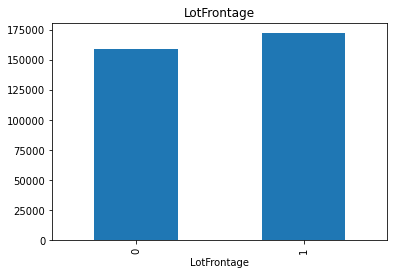

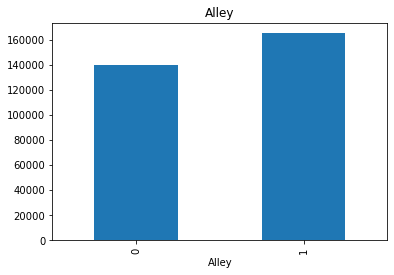

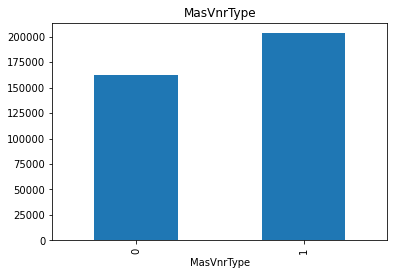

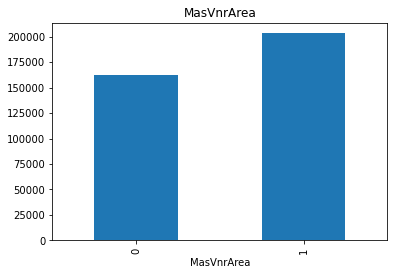

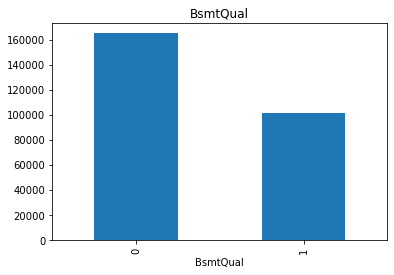

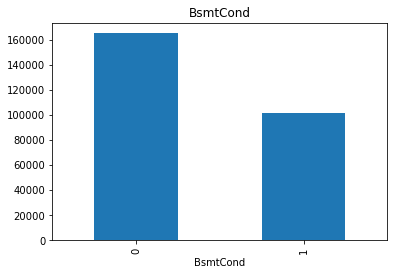

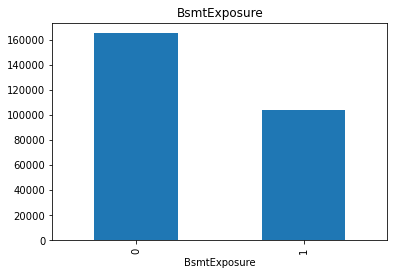

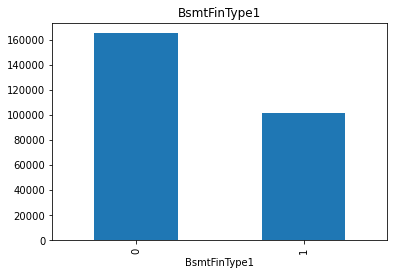

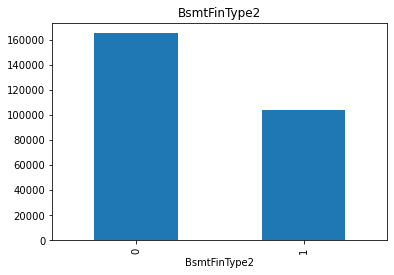

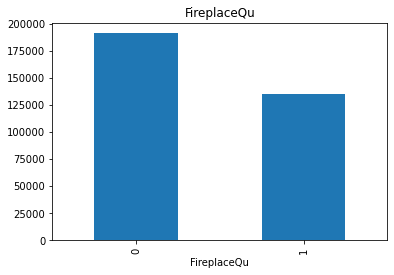

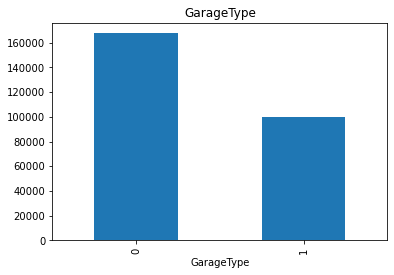

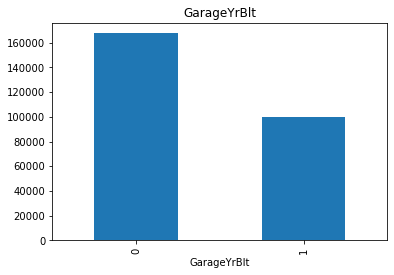

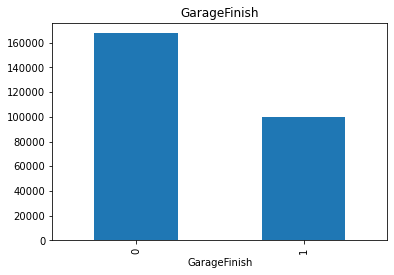

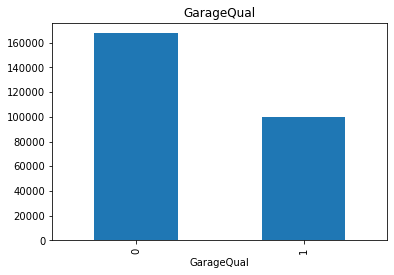

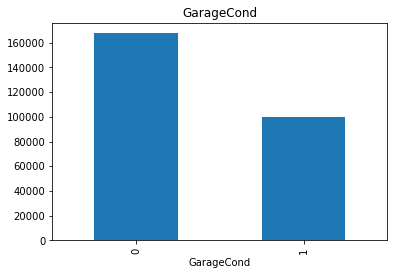

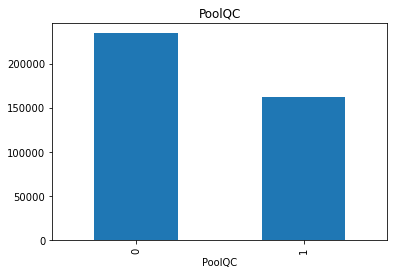

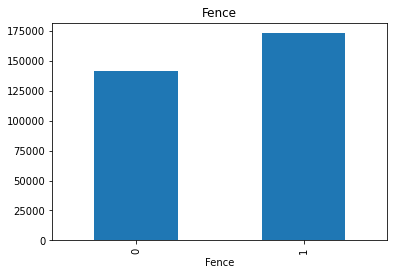

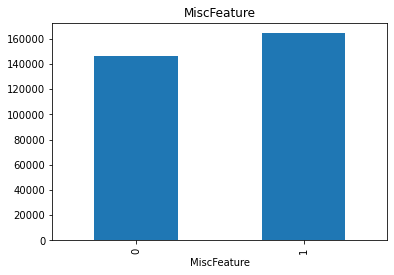

In [12]:
## Since there are many missing values so for dropping the features with missing values/NAN first we have to check the  
## relationship between the missing valued features and SalePrice

for feature in features_with_nan:
    data = dataset.copy() # Making a copy of dataset in data so that dataset will remain intact
    
    ## Let's make a variable 'data[feature]' that indicates 1 if the observation was missing or 0 otherwise
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    ## Let's calculate the median SalePrice where the information is missing or present
    ## The graph shows relationship between the 'feature' w.r.to 'SalePrice' as median since there can be outliers
    ## 1-in x-axis shows missing values of the particular feature
    ## 0-in x-axis shows non missing values of the particular feature
    ## y-axis shows SalePrice
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [13]:
## In the above graphs we can see that there is some relationship between the missing values and the dependent variable 
## 'SalePrice'. So We need to replace these nan values.

In [16]:
## Checking 'dataset' again

dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [18]:
## 2. Numerical Variables

In [19]:
## Making a list of numerical variables
## Variable 'numerical_features' will contain only the features which are integer and floating type

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

## Visualising the numerical variables stored in 'numerical_features'

dataset[numerical_features].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [20]:
## 2.a. Temporal Variable(eg:-Datetime variable)

In [21]:
## Here we will extracting information from the datetime variable like number of years or number of days

## Making a list of features that contain year information and storing it in variable 'year_feature' and finding the 
## numbers of temporal variable

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print("Temporal Variables Count: {}".format(len(year_feature)))


Temporal Variables Count: 4


In [22]:
## Displaying different temporal variable names

print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [23]:
# Exploring the contents of temporal datetime variables

for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Sale Price vs YearSold')

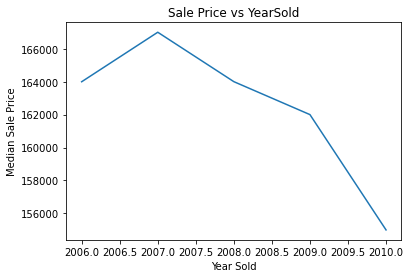

In [24]:
## Analyzing the Temporal Datetime Variables
## Checking whether there is a relation between the year the house is sold 'YrSold' and the 'SalePrice'
## The graph shows relationship between the 'YrSold' w.r.to 'SalePrice' median value 
## x-axis shows the year the house is sold 'YrSold'
## y-axis shows  median SalePrice

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.title("Sale Price vs YearSold")

In [25]:
## In the above graph we are seeing that the sale price is decreasing as the year of selling is increasing.
## But in reality opposite happens,so we have to perform analysis with other year features 
## (temporal datetime variables )w.r.to 'SalePrice' to see how the sale price is changing with years variable

In [26]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

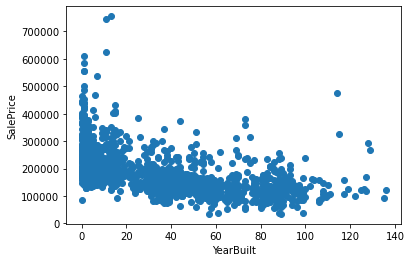

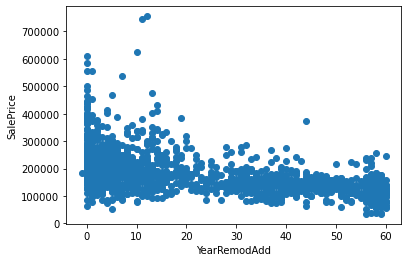

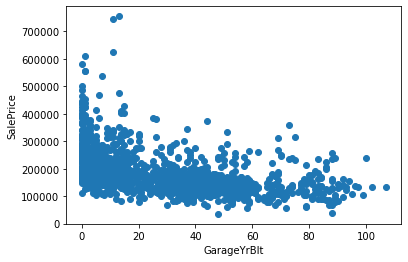

In [28]:
## Here we will see the analysis of other years feature ('YrSold-YearBuilt'),('YrSold-YearRemodAdd'),('YrSold-GarageYrBlt'),
## w.r.to 'SalePrice' using scatter plot
## Comparing the (difference between All years feature with 'SalePrice') and 'SalePrice'

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        
        ## Capturing the difference between year variables and year the house was sold for
        
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [29]:
## In the above graphs we can see that the relation between (difference between All years feature with 'SalePrice') and
## 'SalePrice' are as expected i.e if (difference between All years feature with 'SalePrice') is less the 'SalePrice' should
## be high

In [30]:
## 2.b.Discrete Numerical Variables 

In [31]:
## Listing only the discrete numerical variables and storing them in 'discrete_feature' and finding the number 
## of discrete numerical variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [32]:
## Displaying the different discrete numerical features names

discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [33]:
## Displaying the different discrete numerical feature's content

dataset[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

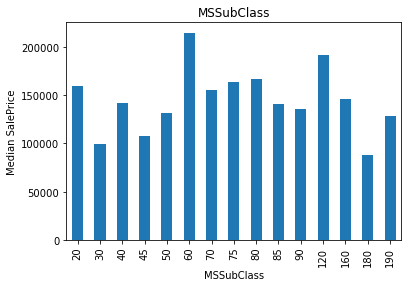

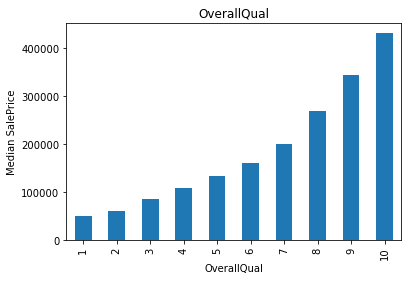

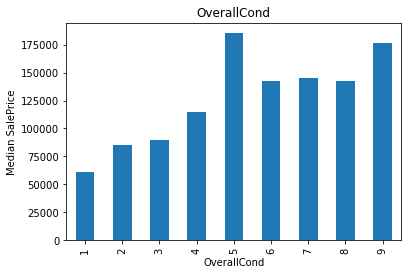

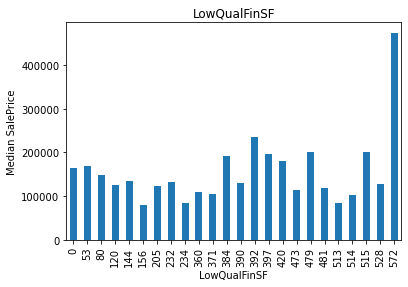

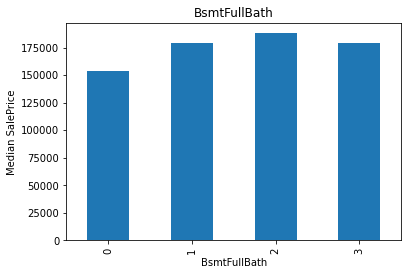

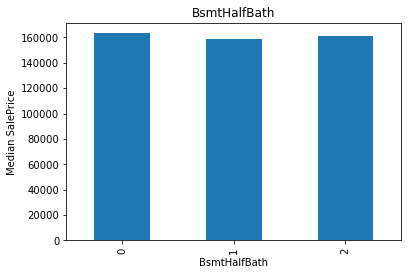

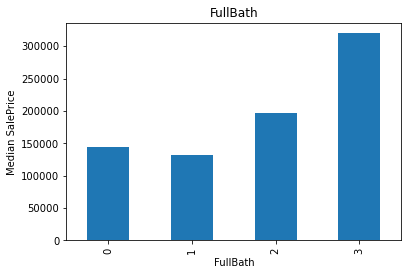

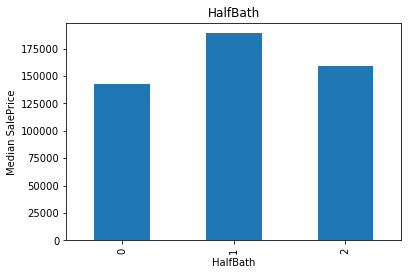

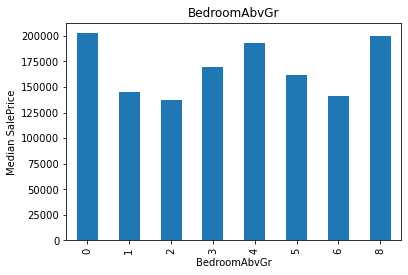

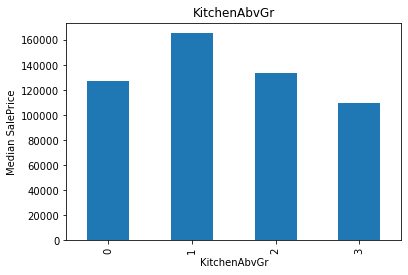

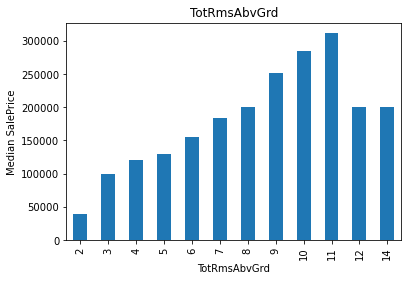

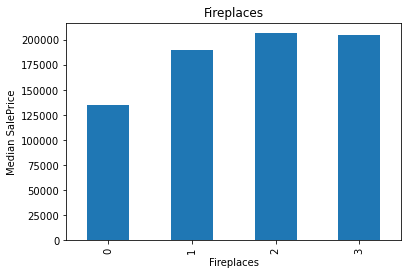

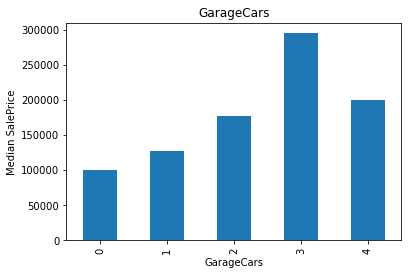

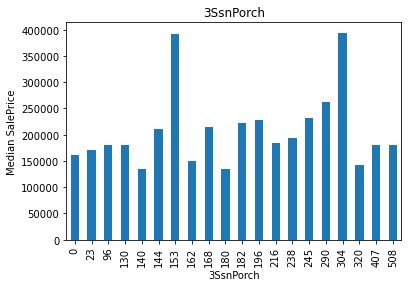

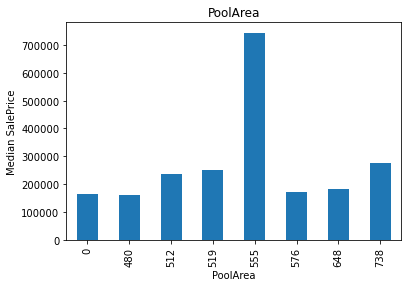

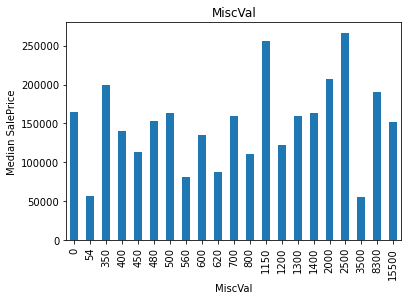

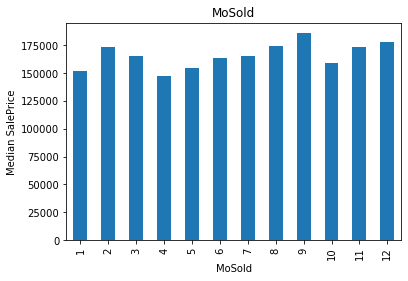

In [34]:
## Finding the relationship between different discrete numerical variables/features 'discrete_feature' w.r.to median 
## 'SalePrice' using bar plot
## 
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(feature)
    plt.show()

In [35]:
## In the above graphs we can see a relationship exists between each individual features of differnt discrete 
## numerical variables and sale price

In [36]:
## 2.c Continuous Numerical variable

In [37]:
## Listing only the continuous numerical variables and storing them in 'continuous_feature' and finding the number 
## of continuous numerical variables

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [38]:
## Displaying the different continuous numerical features names

continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [39]:
## Displaying the different continuous numerical feature's content

dataset[continuous_feature].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

Skewness: nan


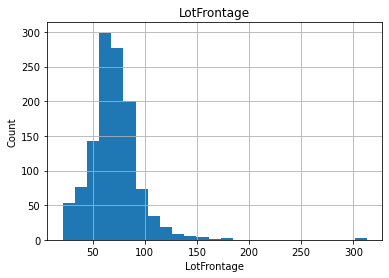

Skewness: 12.195142125084478


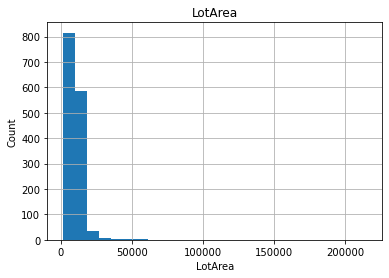

Skewness: nan


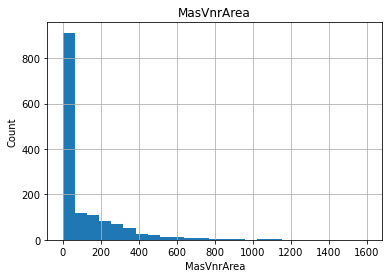

Skewness: 1.6837708962341815


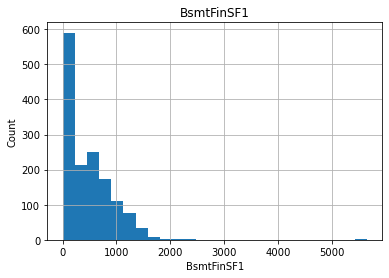

Skewness: 4.250888017057445


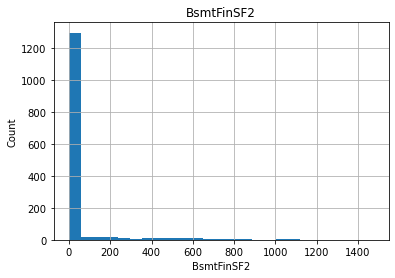

Skewness: 0.9193227015582005


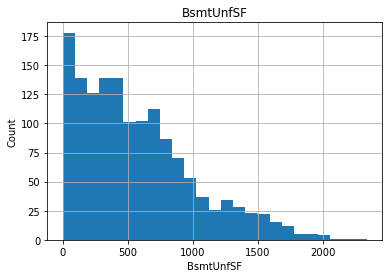

Skewness: 1.522688086978629


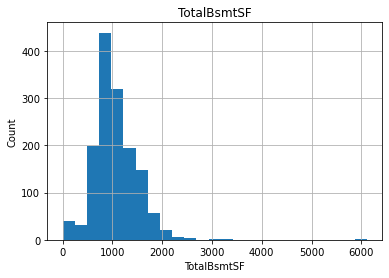

Skewness: 1.3753417421837937


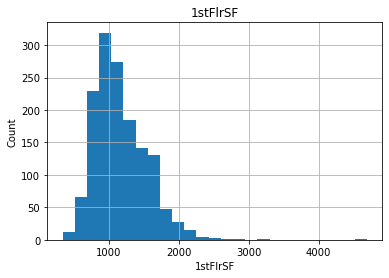

Skewness: 0.8121942731961613


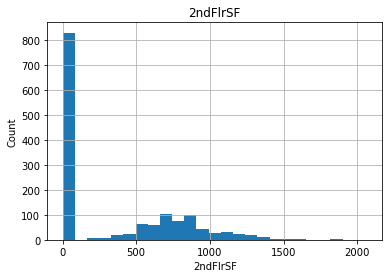

Skewness: 1.365155954773434


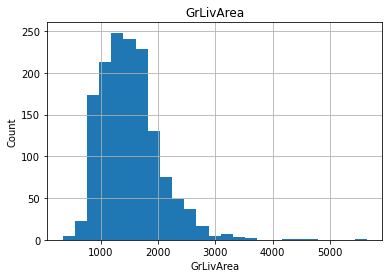

Skewness: 0.1797959420587727


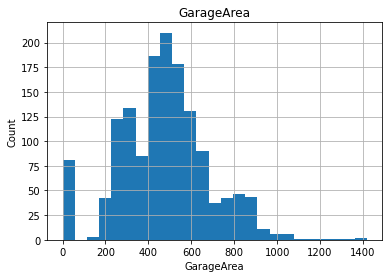

Skewness: 1.5397916998042025


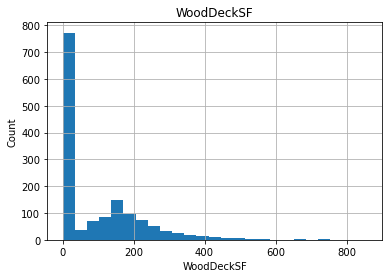

Skewness: 2.361911928568972


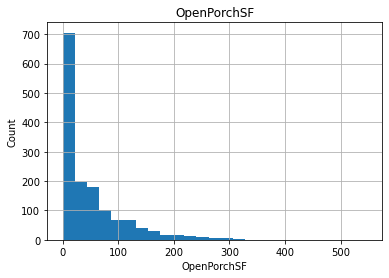

Skewness: 3.086696471376678


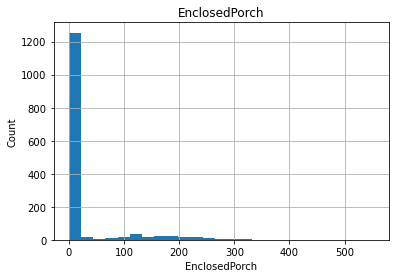

Skewness: 4.1179773827954875


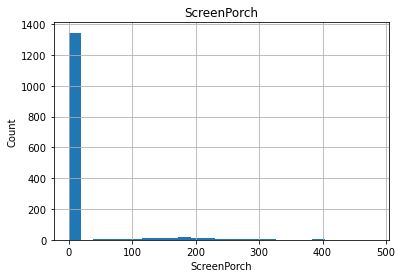

Skewness: 1.880940746034036


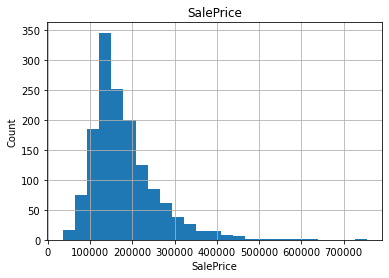

In [40]:
## Analysing the continuous numerical features by creating histograms to understand the distribution 

for feature in continuous_feature:
    data=dataset.copy()
    print("Skewness:",stats.skew(data[feature]))
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [41]:
## In the above histograms we can see that the continuous features are not having a Normal/Gaussian distribution and are 
## mostly positively skewed, so to make the distribution Normal we will perform Logarithmic Transformation

## Here for LotFrontage skewness= nan,since the null values in LotFrontage are not treated till now

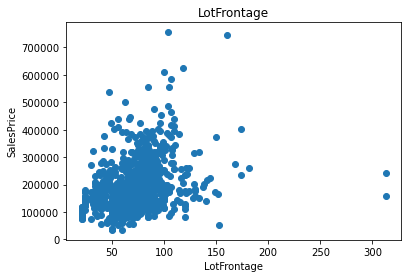

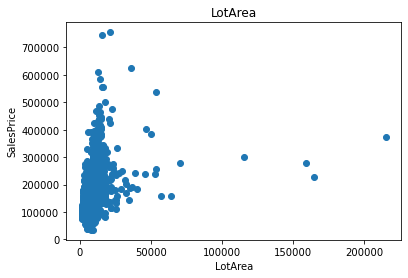

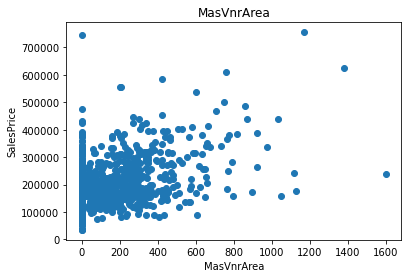

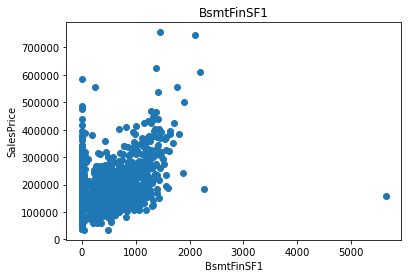

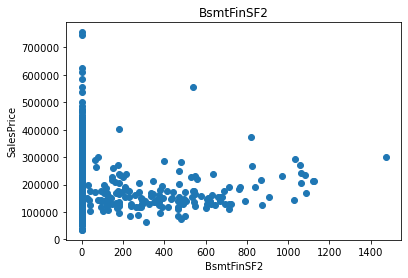

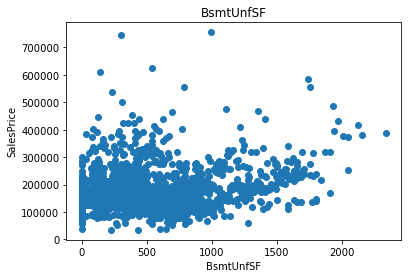

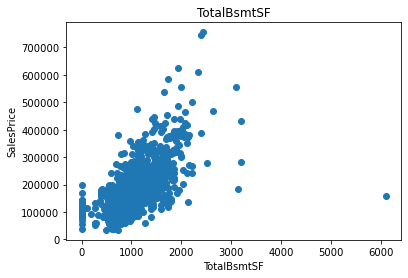

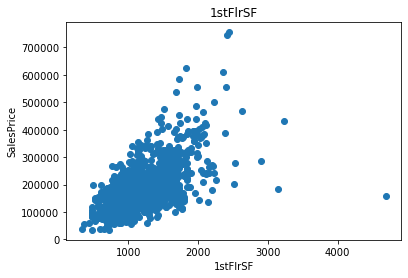

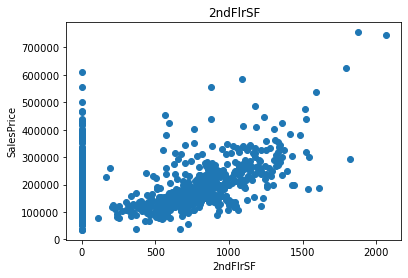

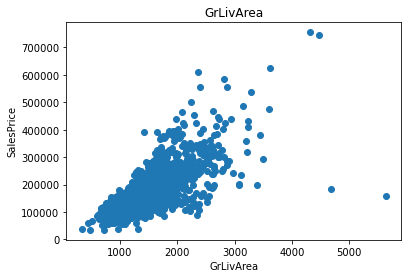

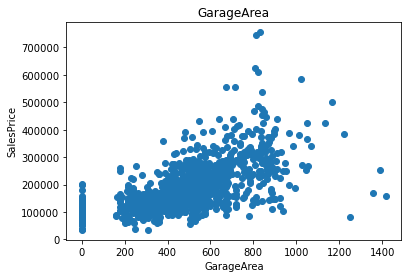

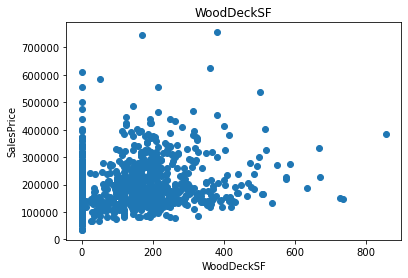

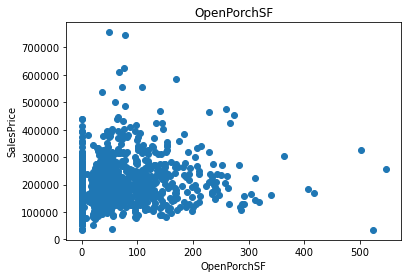

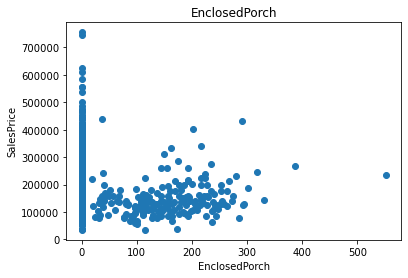

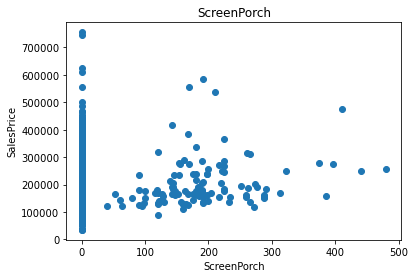

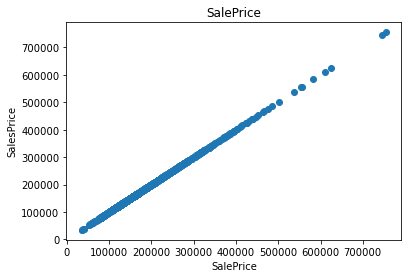

In [42]:
##Analysing the continuous numerical features w.r.to sale price using scatter plot
    
for feature in continuous_feature:
    data=dataset.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [43]:
## In the above scatter plots we cannot observe any monotonic relationship between the continuous numerical features and 
## sale price,so we will apply Logarithmic Transformation and check whether any monotonosity is established or not.

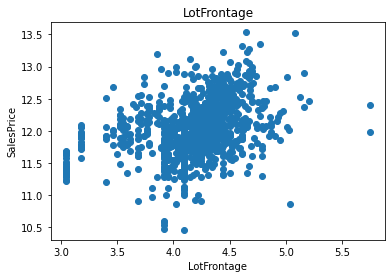

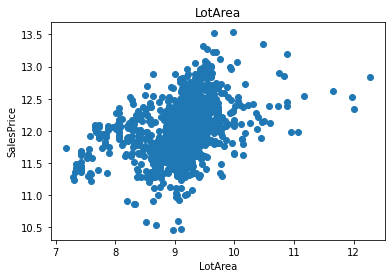

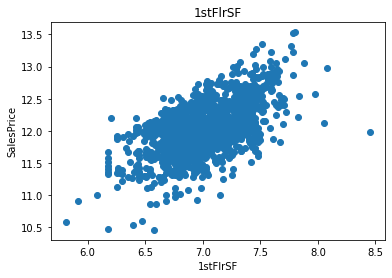

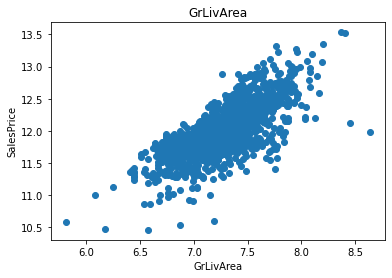

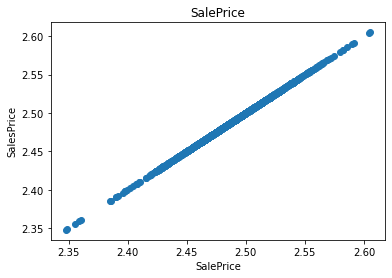

In [44]:
## Applying Logaritmic Transformation to both continuous numerical features and sale price and analysing them w.r.to 
## sale price using scatter plot

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): ## Since log0 is undefined so before applying logarithmic funct excluding 0 values
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


In [45]:
## In the above scatter plots we can observe monotonic relationship between (LotFrontage-SalePrice),(LotArea-SalePrice),
## (1stFlrSF-SalePrice),(GrLivArea-SalePrice),(SalePrice-SalePrice) after Logarithmic Transformation and they will 
## be positively correlated.


## For other continuous numerical features the condition 'if 0 in data[feature].unique():
##                                                             pass                       ' is true, so their scatter plots
## have not been generated

Skewness: nan


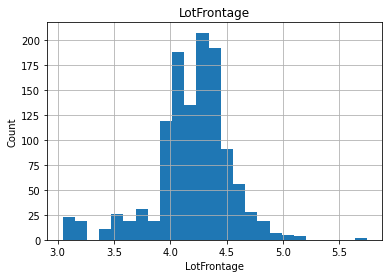

Skewness: -0.1378519937546653


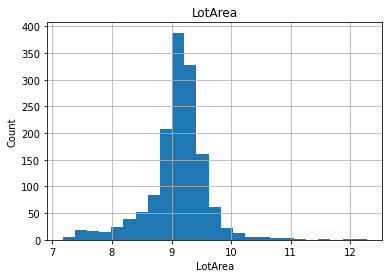

Skewness: 0.07907560338323943


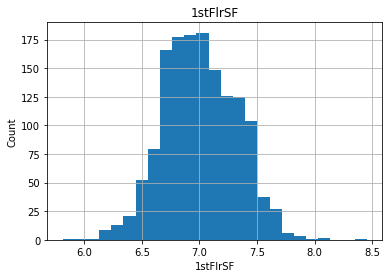

Skewness: -0.006987993304655894


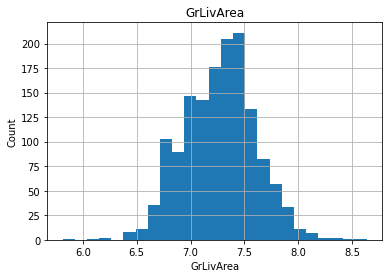

Skewness: -0.020355774276167093


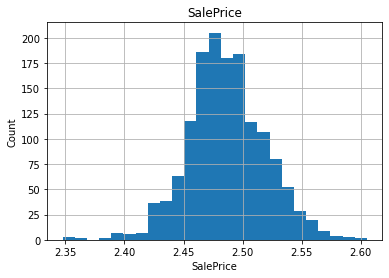

In [46]:
## Applying Logaritmic Transformation to both continuous numerical features and sale price and analysing them w.r.to 
## sale price using histogram

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): ## Since log0 is undefined so before applying logarithmic funct excluding 0 values
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        print("Skewness:",stats.skew(data[feature]))
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()


In [47]:
## In the above histograms we can observe that the skewness is between -1 and +1 so Normal/Gaussian distribution 
## for (LotFrontage-SalePrice),(LotArea-SalePrice),(1stFlrSF-SalePrice),(GrLivArea-SalePrice),(SalePrice-SalePrice) 
## after Logarithmic Transformation has been obtained.

## For other continuous numerical features the condition 'if 0 in data[feature].unique():
##                                                             pass                       ' is true, so their histograms
## have not been generated

## Here for LotFrontage skewness= nan,since the null values in LotFrontage are not treated till now

In [48]:
## Verifying whether 'LotFrontage' has unique count=0 

data['LotFrontage'].unique()==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [49]:
## Verifying whether 'LotArea' has unique count=0 

data['LotArea'].unique()==0

array([False, False, False, ..., False, False, False])

In [50]:
## Verifying whether 'MasVnrArea' has unique count=0 

data['MasVnrArea'].unique()==0

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
## Verifying whether 'ScreenPorch' has unique count=0 

data['ScreenPorch'].unique()==0

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [52]:
## 3. Outliers

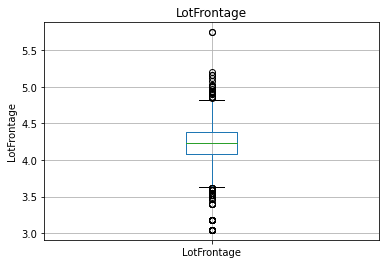

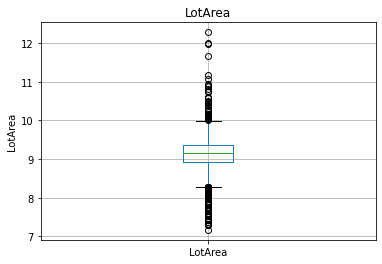

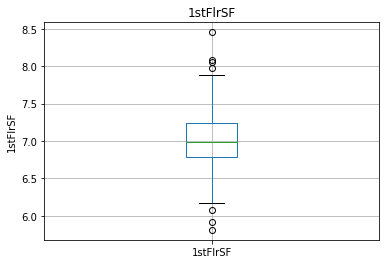

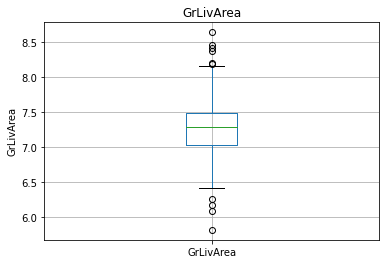

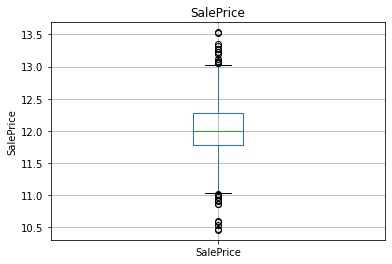

In [53]:
## Checking outliers for continuous numerical feature after performing Logarithmic Transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): ## Since log0 is undefined so before applying logarithmic funct excluding 0 values
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [54]:
## From the above boxplots we can observe that there are outliers for (LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice)

## ## For other continuous numerical features the condition 'if 0 in data[feature].unique():
##                                                             pass                       ' is true, so their boxplots
## have not been generated

In [55]:
## 4. Categorical Variables

In [56]:
## Making a list of categorical variables
## Variable 'categorical_features' will contain only the features which are object type

categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [57]:
## Finding the numbers of categorical features

print("Categorical feature Count {}".format(len(categorical_features)))

Categorical feature Count 43


In [58]:
#### Visualising the categorical variables stored in 'categorical_features'

dataset[categorical_features].head(10)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9       RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
5      Mitchel       Norm       Norm     1Fam     1.5Fin     Gable  CompShg   
6      Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg   
7       NWAmes       PosN       Norm     1Fam     2Story     Gable  CompShg   
8      OldTown     Artery       Norm     1Fam     1.5Fin     Gable  CompShg   
9      BrkSide     Artery     Artery   2fmCon     1.5Unf     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
5     VinylSd     VinylSd       None        TA        TA       Wood       Gd   
6     VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex   
7     HdBoard     HdBoard      Stone        TA        TA     CBlock       Gd   
8     BrkFace     Wd Shng       None        TA        TA     BrkTil       TA   
9     MetalSd     MetalSd       None        TA        TA     BrkTil       TA   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   
5       TA           No          GLQ          Unf    GasA        Ex   
6       TA           Av          GLQ          Unf    GasA        Ex   
7       TA           Mn          ALQ          BLQ    GasA        Ex   
8       TA           No          Unf          Unf    GasA        Gd   
9       TA           No          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   
5          Y      SBrkr          TA        Typ         NaN     Attchd   
6          Y      SBrkr          Gd        Typ          Gd     Attchd   
7          Y      SBrkr   

In [59]:
## Printing the categorical feature names and the number of categories each feature is having

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [60]:
## For categorical features having less than 10 distinct categories we will perform label encoding and for remaining 
## categorical features we will perform other encoding techniques.

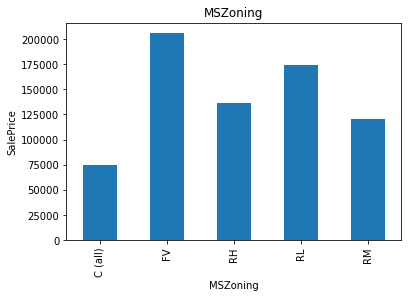

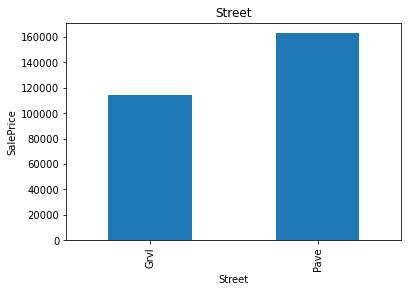

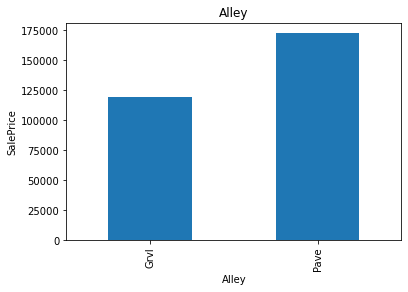

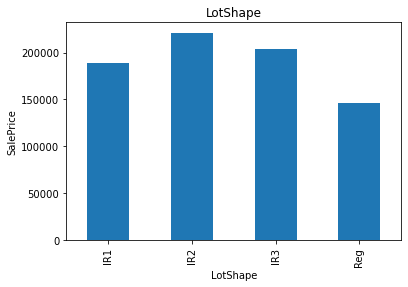

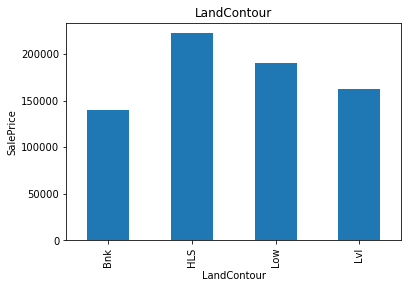

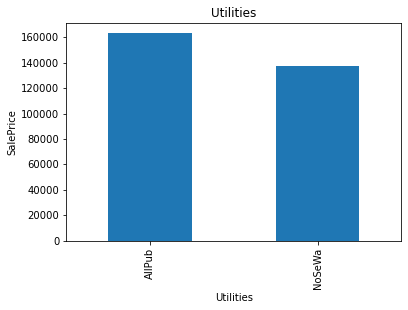

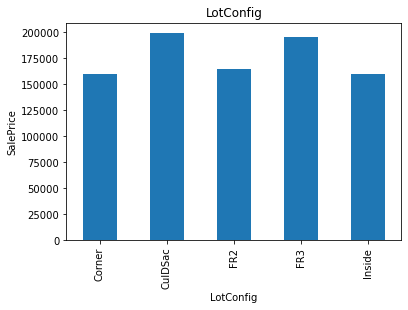

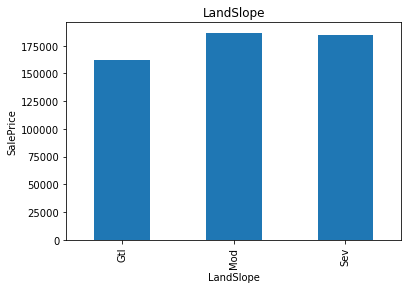

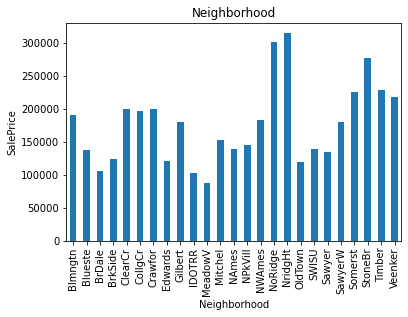

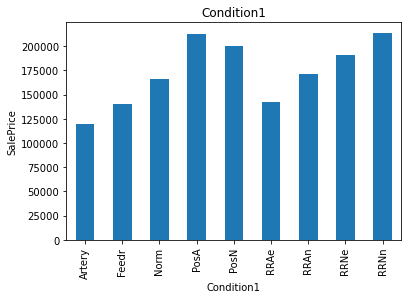

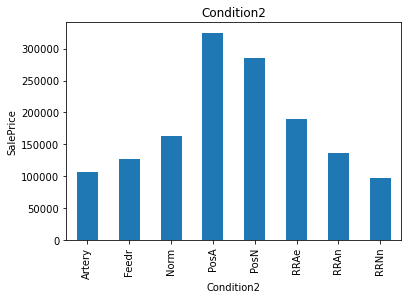

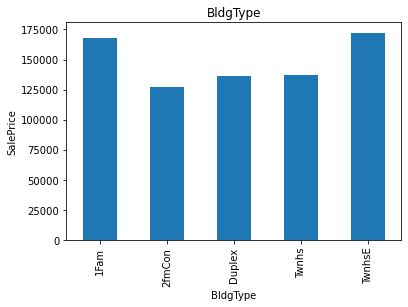

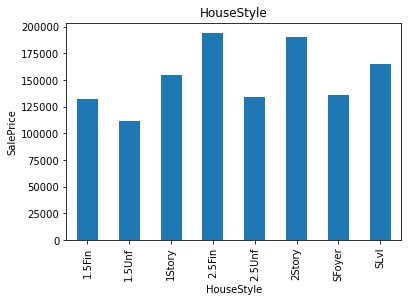

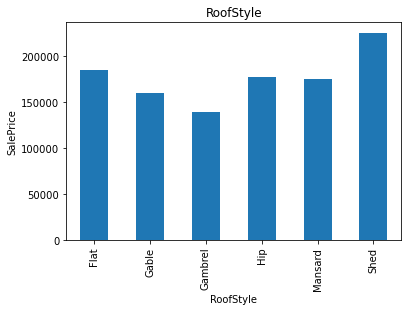

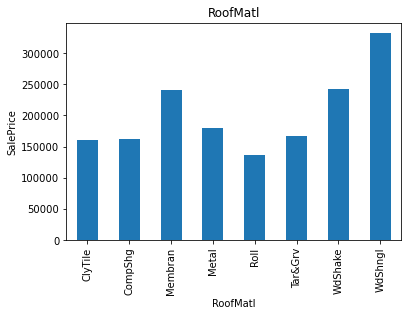

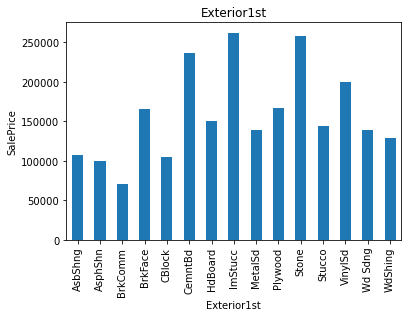

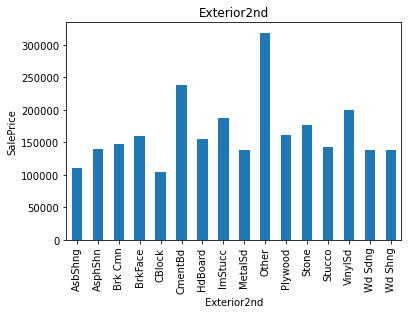

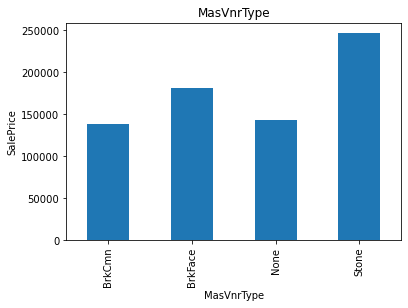

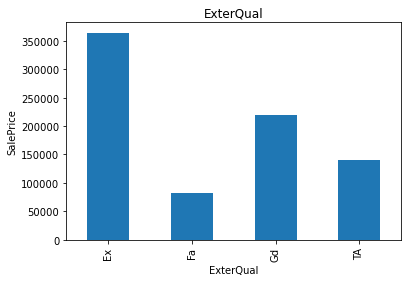

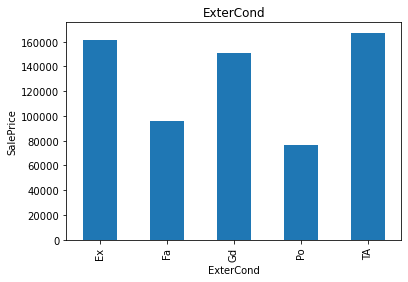

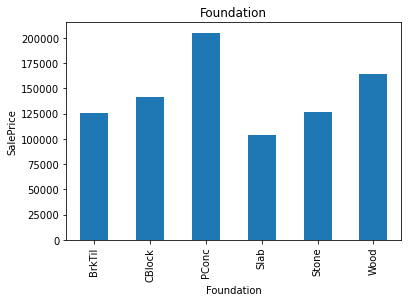

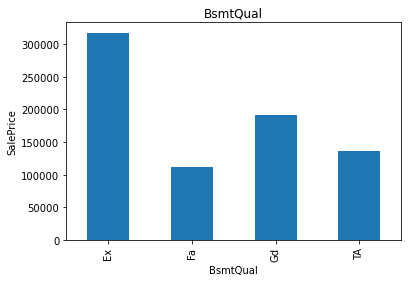

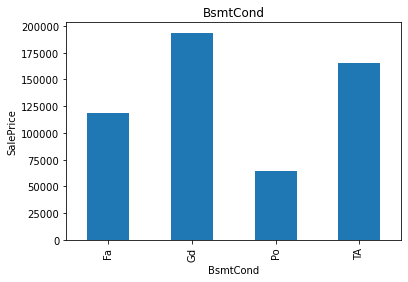

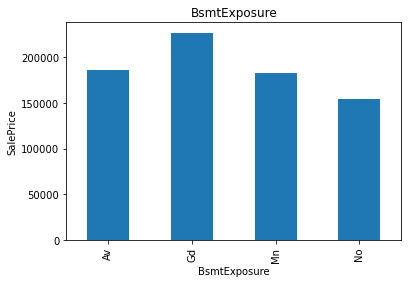

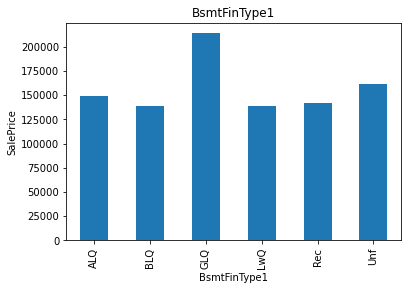

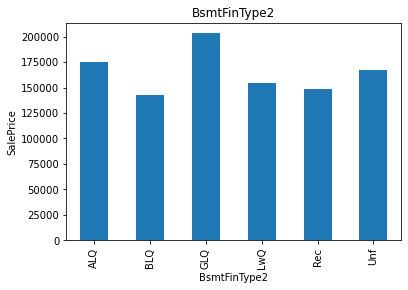

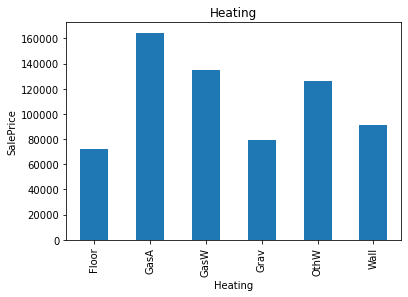

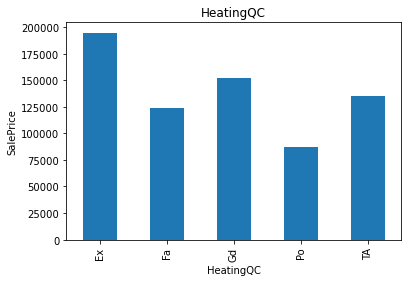

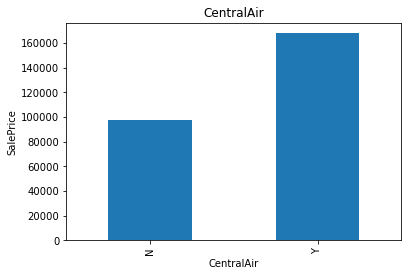

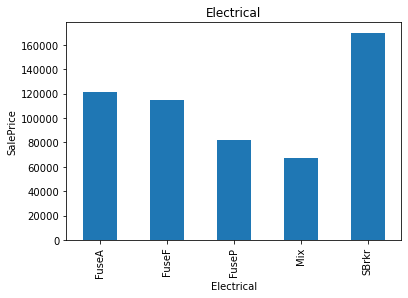

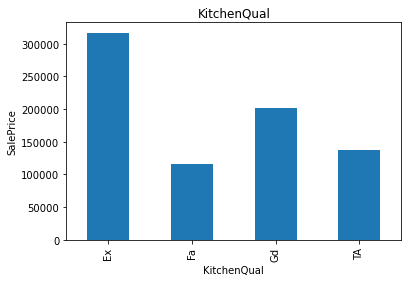

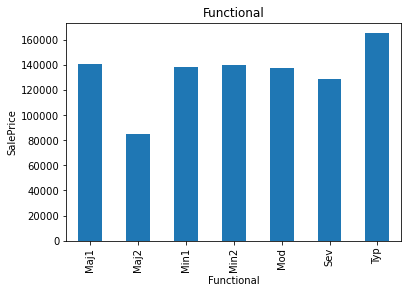

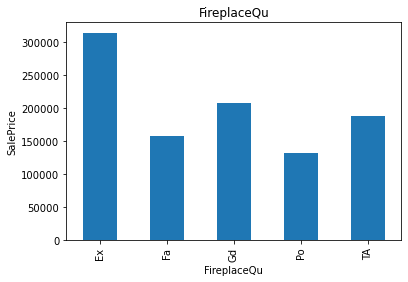

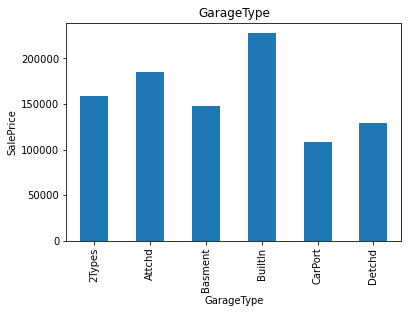

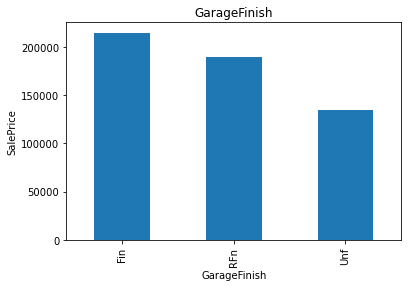

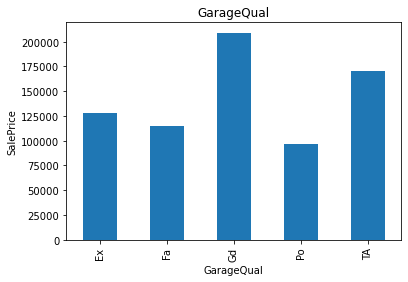

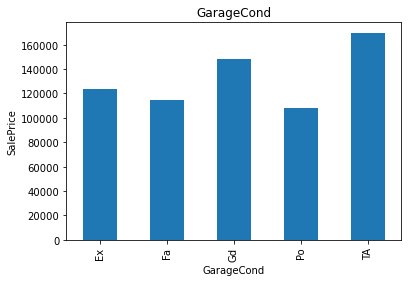

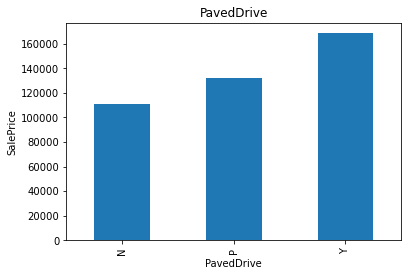

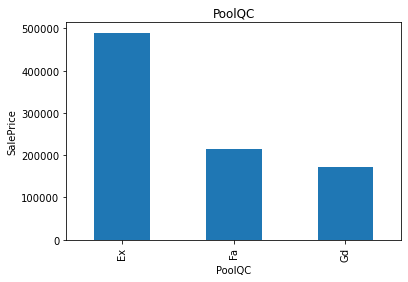

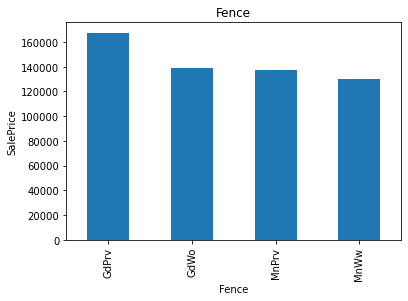

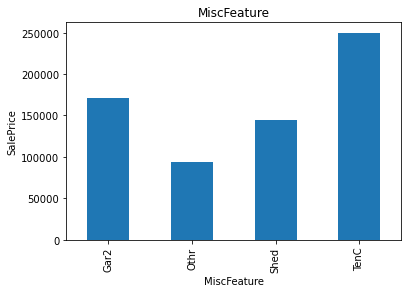

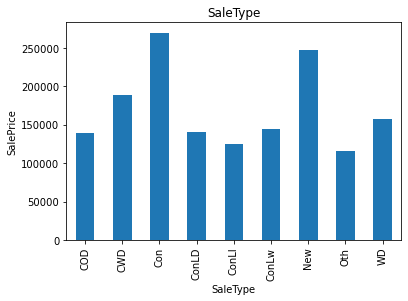

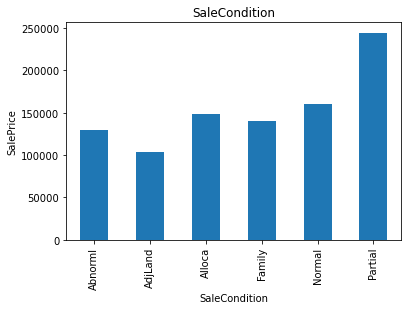

In [61]:
## Plotting the relationship between categorical variable 'categorical_features' and dependent feature 'SalesPrice'

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [62]:
## The above bar plots show that the each categorical variables and their distinct features are having a relationship with
## sale price

## FEATURE ENGINEERING--Here we will perform the following steps----



### Treating missing values
### Treating temporal variables
### Treating Categorical variables: remove rare labels
### Standarise the values of the variables to the same range

### 1.Treating the missing/NAN values

#### 1.a. First we are handling the Categorical features which have missing/NAN values

In [12]:
## Here all the categorical features having missing/NAN values have been taken into the variable 'features_nan'

features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

## Printing the categorical feature names which have null values and the null value percentage (using null value mean)  
## rounded of to 4 decimal places for the corresponding features

for feature in features_nan:
    print("{}: {} * % missing values".format(feature,np.round(dataset[feature].isnull().mean()*100,4)))

Alley: 93.7671 * % missing values
MasVnrType: 0.5479 * % missing values
BsmtQual: 2.5342 * % missing values
BsmtCond: 2.5342 * % missing values
BsmtExposure: 2.6027 * % missing values
BsmtFinType1: 2.5342 * % missing values
BsmtFinType2: 2.6027 * % missing values
FireplaceQu: 47.2603 * % missing values
GarageType: 5.5479 * % missing values
GarageFinish: 5.5479 * % missing values
GarageQual: 5.5479 * % missing values
GarageCond: 5.5479 * % missing values
PoolQC: 99.5205 * % missing values
Fence: 80.7534 * % missing values
MiscFeature: 96.3014 * % missing values


In [13]:
## Printing the number of categorical features only which have missing/NAN values

print('Number of categorical features with NAN values: ', len(features_nan))

Number of categorical features with NAN values:  15


In [14]:
## Replacing the missing/NAN values in categorical features with a new label 'Missing' using function 'replace_cat_feature'

def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

## Calling the function 'replace_cat_feature'

dataset=replace_cat_feature(dataset,features_nan)

## Checking whether there are any NAN values in categorical features after replacing them with new label 'Missing' 

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
## Above we can see that the NAN/misssing values in cayrgorical feature do not exist after replacing them by new label 'Missing'

In [15]:
## Checking whether the missing/NAN values in the categorical features have been replaced by the new label 'Missing'

dataset.head(14)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL          NaN    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL          NaN    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     2Story            9            5       2005   
12       Norm     1Fam     1Story            5            6       1962   
13       Norm     1Fam     1Story            7            5       2006   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd       None   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5           1995     Gable  CompShg     VinylSd     VinylSd       None   
6           2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7           1973     Gable  CompShg     HdBoard  

#### 1.b. Secondly we are handling the Numerical features which have missing/NAN values

In [18]:
## Here we are taking all numerical features having missing/NAN values into the variable 'numerical_with_nan'

numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {} % missing value".format(feature,np.around(dataset[feature].isnull().mean()*100,4)))

LotFrontage: 17.7397 % missing value
MasVnrArea: 0.5479 % missing value
GarageYrBlt: 5.5479 % missing value


In [71]:
## Printing the number of numerical features only which have missing/NAN values

print('Number of numerical features with NAN values: ', len(numerical_with_nan))

Number of numerical features with NAN values:  3


In [72]:
## Finding and printing the median values for 'LotFrontage','MasVnrArea','GarageYrBlt'

for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    print("{}: {} median value".format(feature,median_value))

LotFrontage: 69.0 median value
MasVnrArea: 0.0 median value
GarageYrBlt: 1980.0 median value


In [73]:
## Replacing the Missing/NAN Values in numerical features with their median values


for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers (we can also use mode value for outliers)
    
    median_value=dataset[feature].median() ## It will find out the median value of the particular feature
    
    ## Creating a new feature 'feature+nan' to capture nan values and filling the missing/NAN values in the particular
    ## features with their median values
    
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0) ## This new feature 'feature+nan' is added to the dataset
                                                                   ## to gain more information from the data even after 
                                                                   ## replacing the NAN values with median value
    dataset[feature].fillna(median_value,inplace=True)
    
    ## Checking whether there are any NAN values in numerical features after replacing them with their median values

dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [74]:
## Viewing the dataset after replacing the missing/NAN values in the numerical features 'LotFrontage','MasVnrArea',
## 'GarageYrBlt' with their median values

dataset.tail(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
1360  1361          70       RL         51.0     9842   Pave  Missing   
1361  1362          20       RL        124.0    16158   Pave  Missing   
1362  1363          50       RL         69.0    12513   Pave  Missing   
1363  1364          60       RL         73.0     8499   Pave  Missing   
1364  1365         160       FV         30.0     3180   Pave     Pave   
1365  1366          60       FV         69.0     7500   Pave  Missing   
1366  1367          60       RL         68.0     9179   Pave  Missing   
1367  1368         160       RM         41.0     2665   Pave  Missing   
1368  1369         120       RM         69.0     4435   Pave  Missing   
1369  1370          20       RL         48.0    10635   Pave  Missing   
1370  1371          50       RL         90.0     5400   Pave  Missing   
1371  1372          80       RL         80.0     9600   Pave  Missing   
1372  1373          60       RL         75.0     9750   Pave  Missing   
1373  1374          20       RL         69.0    11400   Pave  Missing   
1374  1375          60       FV         85.0    10625   Pave  Missing   
1375  1376          20       RL         89.0    10991   Pave  Missing   
1376  1377          30       RL         52.0     6292   Pave  Missing   
1377  1378          50       RL         60.0    10998   Pave     Grvl   
1378  1379         160       RM         21.0     1953   Pave  Missing   
1379  1380          80       RL         73.0     9735   Pave  Missing   
1380  1381          30       RL         45.0     8212   Pave     Grvl   
1381  1382          20       RL         69.0    12925   Pave  Missing   
1382  1383          70       RM         60.0     7200   Pave  Missing   
1383  1384          30       RL         69.0    25339   Pave  Missing   
1384  1385          50       RL         60.0     9060   Pave  Missing   
1385  1386          50       RM         40.0     5436   Pave  Missing   
1386  1387          60       RL         80.0    16692   Pave  Missing   
1387  1388          50       RM         60.0     8520   Pave     Grvl   
1388  1389          20       RL         42.0    14892   Pave  Missing   
1389  1390          50       RM         60.0     6000   Pave  Missing   
1390  1391          20       RL         70.0     9100   Pave  Missing   
1391  1392          90       RL         65.0     8944   Pave  Missing   
1392  1393          85       RL         68.0     7838   Pave  Missing   
1393  1394         190       RM         60.0    10800   Pave     Pave   
1394  1395         120       RL         53.0     4045   Pave  Missing   
1395  1396          60       RL         88.0    12665   Pave  Missing   
1396  1397          20       RL         69.0    57200   Pave  Missing   
1397  1398          70       RM         51.0     6120   Pave  Missing   
1398  1399          50       RL         60.0     7200   Pave  Missing   
1399  1400          50       RL         51.0     6171   Pave  Missing   
1400  1401          50       RM         50.0     6000   Pave  Missing   
1401  1402          60       RL         62.0     7415   Pave  Missing   
1402  1403          20       RL         64.0     6762   Pave  Missing   
1403  1404          20       RL         49.0    15256   Pave  Missing   
1404  1405          50       RL         60.0    10410   Pave     Grvl   
1405  1406         120       RM         44.0     3842   Pave  Missing   
1406  1407          85       RL         70.0     8445   Pave  Missing   
1407  1408          20       RL         69.0     8780   Pave  Missing   
1408  1409          70       RM         60.0     7740   Pave  Missing   
1409  1410          60       RL         46.0    20544   Pave  Missing   
1410  1411          60       RL         79.0    12420   Pave  Missing   
1411  1412          50       RL         80.0     9600   Pave  Missing   
1412  1413          90       RL         60.0     7200   Pave  Missing   
1413  1414          20       RL         88.0    10994   Pave  Miss

### 2.  Here we are handling the Temporal features (Datetime Variables) ('YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold') which we found out in data analysis part


#### Since in data analysis part we found out that with 'Yrsold' the 'SalePrice' is decreasing (which is not right) we will  
#### be trying to find out a comparison between ('YearBuilt','YearRemodAdd','GarageYrBlt') and 'YrSold'.So we will not focus 
#### on only 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold' individually instead we will find the difference between 
#### ('YearBuilt','YearRemodAdd','GarageYrBlt') and 'YrSold' and try to work with that.After finding the differnce we will be
#### droping 'YrSold' column

In [75]:
## Here we are finding the difference between 'YrSold' and ('YearBuilt','YearRemodAdd','GarageYrBlt') and putting it in the
## dataset

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [76]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [77]:
## Checking whether the the temporal variables values after filling them with ('YrSold' - 'temporal features')

dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [78]:
## Here we will drop the 'YrSold' column from dataset because we have already calculated the differnce between 'YrSold' and
## ('YearBuilt','YearRemodAdd','GarageYrBlt')

dataset.drop(['YrSold'],axis=1,inplace=True)

In [79]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

### 3. Performing Logarithmic Transformation to continuous numerical features which are skewed

#### In the data analysis part we already found out that 'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
#### 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
#### 'ScreenPorch','SalePrice' are the 16 continuous numerical features and they are skewed (in the histograms).Out of these  
####  16 features only 5 features namely 'LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice' are not not having 
####  any 0 values,so logarithmic transformationcan can be performed on these 5 features only (Since log0 is undefined)
#### and obtain a Normal Distribution for these features

In [80]:
## Defining a variable 'num_features_with_skewness' which will contain the skewed continuous numerical features and then we
## are performing Logarithmic Transformation on these feature values only and updating 'dataset' with these new values
 
num_features_with_skewness=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features_with_skewness:
    dataset[feature]=np.log(dataset[feature])

In [81]:
## Checking whether the 'dataset' is updated with the new log values for 'LotFrontage', 'LotArea', '1stFlrSF', 
## 'GrLivArea', 'SalePrice' 

dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [2]:
#### Above we can see that the values for  features 'LotFrontage', 'LotArea', '1stFlrSF','GrLivArea', 'SalePrice' have been transformed to their logarithmic values

### 4. Handling Rare Categorical Features

#### Here we will try to remove those variables in categorical features which are present less than 1% of the total observation and fill them with a new variable 'Rare_var'

In [82]:
## Capturing all the categorical features if 'dataset' into the variable 'categorical_features'

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [83]:
## Displaying the captured categorical variables

categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [84]:
## Here we are capturing the variables in each categorical features which are present less than 1% of the total obsevation
## and replacing them with a new label 'Rare_var' and updating the 'dataset'

for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset) ## Here we are grouping each features (i.e variables  
                                                                    ## inside each feature) based on 'SalePrice' and dividing  
                                                                    ## it by total length of'dataset' to find the percentage 
                                                                    ## and storing it in variable 'temp'
    
    temp_df=temp[temp>0.01].index ## Here we are considering only those feature variable indexes in 'temp' which are present 
                                  ##  more than 1%  and storing them in 'temp_df' and discarding the remaining feature indexes
    
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var') ## Here those feature variables 
                                                                                          ## which are not in 'temp_df' are 
                                                                                          ## getting replaced by a new label 
                                                                                          ##'Rare_var' in the 'dataset'

In [85]:
## Checking whether the 'dataset' is updated with new label 'Rare_var'  

dataset.head(100)

Id  MSSubClass  MSZoning  LotFrontage    LotArea    Street    Alley  \
0     1          60        RL     4.174387   9.041922      Pave  Missing   
1     2          20        RL     4.382027   9.169518      Pave  Missing   
2     3          60        RL     4.219508   9.328123      Pave  Missing   
3     4          70        RL     4.094345   9.164296      Pave  Missing   
4     5          60        RL     4.430817   9.565214      Pave  Missing   
5     6          50        RL     4.442651   9.554993      Pave  Missing   
6     7          20        RL     4.317488   9.218705      Pave  Missing   
7     8          60        RL     4.234107   9.247829      Pave  Missing   
8     9          50        RM     3.931826   8.719317      Pave  Missing   
9    10         190        RL     3.912023   8.911934      Pave  Missing   
10   11          20        RL     4.248495   9.323669      Pave  Missing   
11   12          60        RL     4.442651   9.386308      Pave  Missing   
12   13          20        RL     4.234107   9.470240      Pave  Missing   
13   14          20        RL     4.510860   9.273503      Pave  Missing   
14   15          20        RL     4.234107   9.298351      Pave  Missing   
15   16          45        RM     3.931826   8.719317      Pave  Missing   
16   17          20        RL     4.234107   9.327323      Pave  Missing   
17   18          90        RL     4.276666   9.286468      Pave  Missing   
18   19          20        RL     4.189655   9.524786      Pave  Missing   
19   20          20        RL     4.248495   8.930626      Pave  Missing   
20   21          60        RL     4.615121   9.562053      Pave  Missing   
21   22          45        RM     4.043051   8.915835      Pave     Grvl   
22   23          20        RL     4.317488   9.184202      Pave  Missing   
23   24         120        RM     3.784190   8.348538      Pave  Missing   
24   25          20        RL     4.234107   9.017484      Pave  Missing   
25   26          20        RL     4.700480   9.563108      Pave  Missing   
26   27          20        RL     4.094345   8.881836      Pave  Missing   
27   28          20        RL     4.584967   9.348187      Pave  Missing   
28   29          20        RL     3.850148   9.700208      Pave  Missing   
29   30          30        RM     4.094345   8.752107      Pave  Missing   
30   31          70  Rare_var     3.912023   9.047821      Pave     Pave   
31   32          20        RL     4.234107   9.052985      Pave  Missing   
32   33          20        RL     4.442651   9.310095      Pave  Missing   
33   34          20        RL     4.248495   9.264071      Pave  Missing   
34   35         120        RL     4.094345   8.897409      Pave  Missing   
35   36          60        RL     4.682131   9.504352      Pave  Missing   
36   37          20        RL     4.718499   9.292750      Pave  Missing   
37   38          20        RL     4.304065   9.051579      Pave  Missing   
38   39          20        RL     4.219508   8.977399      Pave  Missing   
39   40          90        RL     4.174387   8.706159      Pave  Missing   
40   41          20        RL     4.430817   9.066239      Pave  Missing   
41   42          20        RL     4.744932   9.735365      Pave  Missing   
42   43          85        RL     4.234107   9.124782      Pave  Missing   
43   44          20        RL     4.234107   9.126959      Pave  Missing   
44   45          20        RL     4.248495   8.980298      Pave  Missing   
45   46         120        RL     4.110874   8.943506      Pave  Missing   
46   47          50        RL     3.871201   9.458918      Pave  Missing   
47   48          20        FV     4.430817   9.314340      Pave  Missing   
48   49         190        RM     3.496508   8.402007      Pave  Missing   
49   50          20        RL     4.189655   8.954415      Pave  Missing   
50   51          60        RL     4.234107   9.537411      Pave  Missing   
51   52          50        RM     3.951244   8.738735

In [86]:
dataset.shape

(1460, 83)

In [87]:
## Encoding the categorical features

for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [88]:
## Checking the 'dataset' after performing encoding for the categorical features

dataset.head(100)

Id  MSSubClass  MSZoning  LotFrontage    LotArea  Street  Alley  \
0     1          60         3     4.174387   9.041922       1      2   
1     2          20         3     4.382027   9.169518       1      2   
2     3          60         3     4.219508   9.328123       1      2   
3     4          70         3     4.094345   9.164296       1      2   
4     5          60         3     4.430817   9.565214       1      2   
5     6          50         3     4.442651   9.554993       1      2   
6     7          20         3     4.317488   9.218705       1      2   
7     8          60         3     4.234107   9.247829       1      2   
8     9          50         1     3.931826   8.719317       1      2   
9    10         190         3     3.912023   8.911934       1      2   
10   11          20         3     4.248495   9.323669       1      2   
11   12          60         3     4.442651   9.386308       1      2   
12   13          20         3     4.234107   9.470240       1      2   
13   14          20         3     4.510860   9.273503       1      2   
14   15          20         3     4.234107   9.298351       1      2   
15   16          45         1     3.931826   8.719317       1      2   
16   17          20         3     4.234107   9.327323       1      2   
17   18          90         3     4.276666   9.286468       1      2   
18   19          20         3     4.189655   9.524786       1      2   
19   20          20         3     4.248495   8.930626       1      2   
20   21          60         3     4.615121   9.562053       1      2   
21   22          45         1     4.043051   8.915835       1      0   
22   23          20         3     4.317488   9.184202       1      2   
23   24         120         1     3.784190   8.348538       1      2   
24   25          20         3     4.234107   9.017484       1      2   
25   26          20         3     4.700480   9.563108       1      2   
26   27          20         3     4.094345   8.881836       1      2   
27   28          20         3     4.584967   9.348187       1      2   
28   29          20         3     3.850148   9.700208       1      2   
29   30          30         1     4.094345   8.752107       1      2   
30   31          70         0     3.912023   9.047821       1      1   
31   32          20         3     4.234107   9.052985       1      2   
32   33          20         3     4.442651   9.310095       1      2   
33   34          20         3     4.248495   9.264071       1      2   
34   35         120         3     4.094345   8.897409       1      2   
35   36          60         3     4.682131   9.504352       1      2   
36   37          20         3     4.718499   9.292750       1      2   
37   38          20         3     4.304065   9.051579       1      2   
38   39          20         3     4.219508   8.977399       1      2   
39   40          90         3     4.174387   8.706159       1      2   
40   41          20         3     4.430817   9.066239       1      2   
41   42          20         3     4.744932   9.735365       1      2   
42   43          85         3     4.234107   9.124782       1      2   
43   44          20         3     4.234107   9.126959       1      2   
44   45          20         3     4.248495   8.980298       1      2   
45   46         120         3     4.110874   8.943506       1      2   
46   47          50         3     3.871201   9.458918       1      2   
47   48          20         4     4.430817   9.314340       1      2   
48   49         190         1     3.496508   8.402007       1      2   
49   50          20         3     4.189655   8.954415       1      2   
50   51          60         3     4.234107   9.537411       1      2   
51   52          50         1     3.951244   8.738735       1      2   
52   53          90         1     4.700480   9.044522       0      2   
53   54          20         3     4.219508  10.825184       1      2   
54   55          80         3     4.094345   

In [3]:
## Above we can see that all the features of 'dataset' have been transformed into numbers

In [89]:
## Checking the shape (rows,column) of 'dataset' after encoding the categorical features

dataset.shape

(1460, 83)

### 6. Feature Scaling

In [90]:
## Here we are trying to capture all the features except 'Id' and 'Saleprice' so that we can scale those feature values 
## and storing them into the variable 'feature_scale'

feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice'] ]

## Here we are displaying the number of features which are to be scaled

len(feature_scale)

81

In [91]:
## Here we are displaying all the feature names which are to be scaled

feature_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [92]:
## We are using minmaxscaler to scale the features

scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [93]:
## Here we are viewing the scaled features(i.e the features present in variable 'feature_scale') in array form

scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [94]:
# Here we are concatinating the scaled features with 'Id' and "SalePrice" columns which were not considered in feature 
## scaling and saving them in a dataframe 'data_main'

data_main = pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [95]:
## Here in the dataframe 'data_main' we can see all the scaled features

data_main.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [4]:
## Above we can see all the features after getting scaled

# Feature Selection

#### Here we will use SelectFromModel and Lasso Regression for feature selection

In [96]:
## Viewing the data from which features will get selected

data_main.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [97]:
## Capturing the dependent feature into 'y_train'

y_train=data_main[['SalePrice']]

In [98]:
y_train.head()

SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216

In [99]:
## Here we are droping dependent feature 'SalePrice' and other column 'Id' from dataset

X_train=data_main.drop(['Id','SalePrice'],axis=1)

In [100]:
## Applying Lasso Regression technique for Feature Selection

## Firstly, we are specifying the Lasso Regression model, and selecting a suitable alpha  value (equivalent of penalty).
## The bigger the alpha value the less features that will be selected.

## Then we are using the SelectFromModel object from sklearn,which will select the features whose coefficients are non-zero

## Variable 'feature_sel_model' contains the features which have been selected 

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [101]:
## Here we can see the features which have been selected and also not selected in array form

feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [102]:
## Here we are defining a variable 'selected_feat' which will contain the selected features and we are displaying differnt
## statistics regarding the selected features

selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 81
selected features: 21
features with coefficients shrank to zero: 60


In [103]:
## Here we can the see the features which have been selected and can be used for modelling 

selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [104]:
## The selected features have been stored in the datframe 'model_data' which can be used for model training and testing

model_data=X_train[selected_feat]

In [105]:
model_data

MSSubClass  MSZoning  Neighborhood  OverallQual  YearRemodAdd  \
0       0.235294      0.75      0.636364     0.666667      0.098361   
1       0.000000      0.75      0.500000     0.555556      0.524590   
2       0.235294      0.75      0.636364     0.666667      0.114754   
3       0.294118      0.75      0.727273     0.666667      0.606557   
4       0.235294      0.75      1.000000     0.777778      0.147541   
5       0.176471      0.75      0.409091     0.444444      0.245902   
6       0.000000      0.75      0.818182     0.777778      0.049180   
7       0.235294      0.75      0.545455     0.666667      0.606557   
8       0.176471      0.25      0.181818     0.666667      0.967213   
9       1.000000      0.75      0.136364     0.444444      0.967213   
10      0.000000      0.75      0.272727     0.444444      0.721311   
11      0.235294      0.75      0.954545     0.888889      0.016393   
12      0.000000      0.75      0.272727     0.444444      0.770492   
13      0.000000      0.75      0.636364     0.666667      0.016393   
14      0.000000      0.75      0.363636     0.555556      0.803279   
15      0.147059      0.25      0.136364     0.666667      0.114754   
16      0.000000      0.75      0.363636     0.555556      0.672131   
17      0.411765      0.75      0.272727     0.333333      0.655738   
18      0.000000      0.75      0.454545     0.444444      0.081967   
19      0.000000      0.75      0.363636     0.444444      0.737705   
20      0.235294      0.75      0.954545     0.777778      0.016393   
21      0.147059      0.25      0.000000     0.666667      0.950820   
22      0.000000      0.75      0.636364     0.777778      0.114754   
23      0.588235      0.25      0.045455     0.444444      0.524590   
24      0.000000      0.75      0.272727     0.444444      0.163934   
25      0.000000      0.75      0.954545     0.777778      0.049180   
26      0.000000      0.75      0.363636     0.444444      0.180328   
27      0.000000      0.75      0.954545     0.777778      0.049180   
28      0.000000      0.75      0.363636     0.444444      0.163934   
29      0.058824      0.25      0.136364     0.333333      0.967213   
30      0.294118      0.00      0.000000     0.333333      0.967213   
31      0.000000      0.75      0.272727     0.444444      0.049180   
32      0.000000      0.75      0.636364     0.777778      0.032787   
33      0.000000      0.75      0.363636     0.444444      0.852459   
34      0.588235      0.75      0.954545     0.888889      0.049180   
35      0.235294      0.75      0.954545     0.777778      0.032787   
36      0.000000      0.75      0.636364     0.444444      0.245902   
37      0.000000      0.75      0.363636     0.444444      0.327869   
38      0.000000      0.75      0.363636     0.444444      0.065574   
39      0.411765      0.75      0.227273     0.333333      0.885246   
40      0.000000      0.75      0.363636     0.555556      0.688525   
41      0.000000      0.75      0.863636     0.444444      0.803279   
42      0.382353      0.75      0.454545     0.444444      0.409836   
43      0.000000      0.75      0.636364     0.444444      0.475410   
44      0.000000      0.75      0.363636     0.444444      0.786885   
45      0.588235      0.75      0.954545     0.888889      0.098361   
46      0.176471      0.75      0.409091     0.666667      0.114754   
47      0.000000      1.00      0.818182     0.777778      0.032787   
48      1.000000      0.25      0.181818     0.333333      0.032787   
49      0.000000      0.75      0.272727     0.444444      0.688525   
50      0.235294      0.75      0.590909     0.555556      0.180328   
51      0.176471      0.25      0.136364     0.555556      0.934426   
52      0.411765      0.25      0.000000     0.444444      0.786885   
53      0.000000      0.75      0.500000     0.888889      0.327869   
54      0.352941      0.75      0.363636     0.444444      0.868852   
55      0.000000      0.75    

In [106]:
## Saving the selected 21 features in 'model_data.csv' so that it can be used in modeling

model_data.to_csv('model_data.csv',index=False)

In [107]:
## Saving the target variable 'SalePrice' in 'y_train.csv' so that it can be used in modeling

y_train.to_csv('y_train.csv',index=False)